#1) What is Simple Linear Regression ?
 - Simple Linear Regression is a method to model the relationship between one independent variable (X) and one dependent variable (Y) using a straight line.





#2) What are the key assumptions of Simple Linear Regression ?
        - Linearity: The relationship betweeb X and Y is linear.
        - Independence of Errors : Observations are independent.
        - Homodscedasticity: Constant variance of residuals across all levels of X.
        - Normality of Errors: Residuals are normally distributed.
        - No Multicollinearity ( only relevant if multiple predictors are used, so not strictly for simple linear regression).





#3) What is heteroscedasticity, and why is it important to address in regression models ?
  - Heteroscedicity means the variance of errors is not constant across all values of the independent variable. It is important to address in regression models as it wiil lead to biased standard error ( unreliable p-values and confidence intervals) and can make the model's predictions less trustworthy.





#4) What is Multiple Linear Regression ?
 - Multiple Linear Regression is regression technique that models the relationship between one dependent variable and two or more independent variables.





#5) What is polynomial regression, and how does it differ from linear regression ?
  - Polynomial regression is a type of regression that fits a curved line to the data. It differs from linear regression as it fits a curved line and used when the relationship between dependent and independent variable is non-linear.

  


[[1.98]]
[0.18]


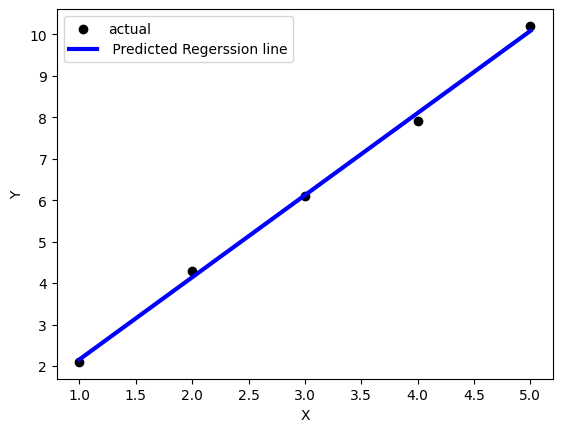

In [3]:
#6 Implement a Python program to fit a Simple Linear Regression model to the following sample data:
""" X=[1,2,3,4,5]
    Y=[2.1,4.3,6.1,7.9,10.2]
    Plot the regression line over the data points."""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X=[1,2,3,4,5]
Y=[2.1,4.3,6.1,7.9,10.2]

X1=np.array(X).reshape(-1,1)
Y1=np.array(Y).reshape(-1,1)


model=LinearRegression()
model.fit(X1,Y1)

print(model.coef_)
print(model.intercept_)
Y1_pred=model.predict(X1)

plt.scatter(X1,Y1, color="black", label="actual")
plt.plot(X1, Y1_pred, color="blue", linewidth=3, label=" Predicted Regerssion line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [6]:
#7 Fit a Multiple Linear Regression model on this sample data:
""" Area=[1200,1500,1800,2000]
    Rooms=[2,3,3,4]
    Price=[250000,300000,320000,370000]
    Check for multicollinearity using VIF and report the results."""



import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


Area=[1200,1500,1800,2000]
Rooms=[2,3,3,4]
Price=[250000,300000,320000,370000]

Area1=np.array(Area)
Rooms1=np.array(Rooms)
Price1=np.array(Price)

X=pd.DataFrame({"Area1":Area1,"Rooms1":Rooms1})
Y=Price1

model=LinearRegression()
model.fit(X,Y)

X_with_constant=sm.add_constant(X)

vif_data=pd.DataFrame()
vif_data["Features"]=X_with_constant.columns
vif_data["VIF"]=[ variance_inflation_factor(X_with_constant.values,i) for i in range(X_with_constant.shape[1])]

print(model.coef_)
print(model.intercept_)
print(vif_data)


[   63.15789474 34736.84210526]
103157.89473684214
  Features        VIF
0    const  34.210526
1    Area1   7.736842
2   Rooms1   7.736842


[0.   1.94 0.2 ]
0.06000000000000938


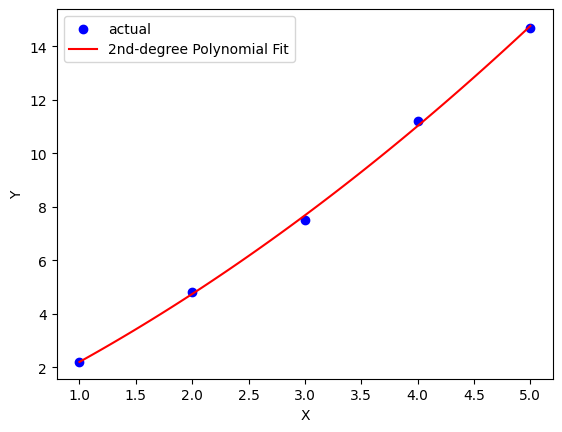

In [9]:
#8 Implement polynomial regression on the following data:
""" X=[1,2,3,4,5]
    Y=[2.2,4.8,7.5,11.2,14.7]
    Find a 2nd-degree polynomial and plot the resulting curve."""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X=np.array([1,2,3,4,5]).reshape(-1,1)
Y=np.array([2.2,4.8,7.5,11.2,14.7])

poly= PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

model=LinearRegression()
model.fit(X_poly,Y)

X_range=np.linspace(1,5,100).reshape(-1,1)
X_range_poly=poly.transform(X_range)
Y_pred=model.predict(X_range_poly)

print(model.coef_)
print(model.intercept_)

plt.scatter(X,Y,color="blue", label="actual")
plt.plot(X_range,Y_pred, color="red", label="2nd-degree Polynomial Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

[-3.   5.5 -1.  -2.5  1. ]


/tmp/ipython-input-2490615189.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


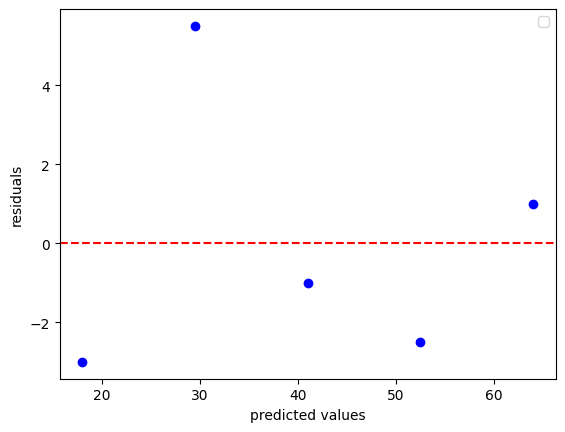

In [12]:
#9 Create a residual plot for a regression model trained on this data:
""" X=[10,20,30,40,50]
    Y=[15,35,40,50,65]
    Assess heteroscedasticity by examining the spread of residuals."""




import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


X=np.array([10,20,30,40,50]).reshape(-1,1)
Y=np.array([15,35,40,50,65])

model=LinearRegression()
model.fit(X,Y)
Y_pred=model.predict(X)
residuals=Y-Y_pred
print(residuals)

plt.scatter(Y_pred, residuals,color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.legend()
plt.show()


#10) Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
   - Heteroscedasticity ( The error terms do not have constant varaince( spread of errors increases with price )) : To fix this we need to transform the target(e.g., use log(price) instead of price) and also we can use weighted least squares or robust standard errors.
   
   - Multicollinearity ( some features like area and number of areas are highly correlated, making coefficients unstable) : To fix this, we need to check correlation matrix or VIF( Variance inflation factor), drop one of the highly correlated features and we can use regularization methods like Ridge or Lasso regression that handles multicollinearity well.